In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
#import gurobipy

In [10]:
#python3 -m pip install cvxpy
#conda install -c conda-forge cvxpy
#import cvxpy as cp

In [11]:
df = pd.read_csv("breast cancer.csv")
df

,Age,Year of operation,No. of positive axillary,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [12]:
import random
indices = []
for i in range(306):
    indices.append(i)

labeled_indices = random.sample(indices, 147)
unlabeled_indices = []

for j in indices:
    if labeled_indices.count(j) == 0:
        unlabeled_indices.append(j)

In [13]:
Y_correct = df['Survival status']

Y = np.zeros(147)
X = np.zeros((306, 4))
Y_true = np.zeros(159)
Y_buff = np.zeros(159)
arr = np.asarray(df)


for i in range(147):
    Y[i] = Y_correct[labeled_indices[i]]
    X[i] = arr[labeled_indices[i]]
    
for j in range(159):
    X[147 + j] = arr[unlabeled_indices[j]]
    Y_true[j] = Y_correct[unlabeled_indices[j]]

In [14]:
def sim(i, j):
    s = 0
    if df.iloc[i, 0] == df.iloc[j, 0]:
        s += 10
    if df.iloc[i, 1] == df.iloc[j, 1]:
        s += 5
    if df.iloc[i, 2] == df.iloc[j, 2]:
        s += 20
    return s

In [15]:
def dist(i, j):
    dist = []
    #dist = [97, 102, 110, 125]
    for ind in (range(1,4)):
        dist.append((df.iloc[i, ind] - df.iloc[j, ind])**2)
    return np.sqrt(sum(dist))

In [16]:
similarity = np.zeros((306, 306))
dists = np.zeros((306, 306))

In [17]:
for i in range(306):
    for j in range(306):
        if i != j:
            similarity[i, j] = sim(i, j)
            dists[i, j] = dist(i, j)
        else:
            dists[i, j] = 10

print(dists)

[[10.          2.82842712  1.41421356 ...  2.23606798  1.41421356
   6.164414  ]
 [ 2.82842712 10.          4.24264069 ...  3.          3.74165739
   4.24264069]
 [ 1.41421356  4.24264069 10.         ...  3.          1.41421356
   7.34846923]
 ...
 [ 2.23606798  3.          3.         ... 10.          2.23606798
   7.14142843]
 [ 1.41421356  3.74165739  1.41421356 ...  2.23606798 10.
   7.07106781]
 [ 6.164414    4.24264069  7.34846923 ...  7.14142843  7.07106781
  10.        ]]


In [18]:
def KNNgraph(n, s):
    weights = np.zeros((306, 306))
    for a in range(306):
        arr = s[a,:]
        tmp = np.argpartition(arr, -n)[-n:]
        ind = tmp[np.argsort((-arr)[tmp])]
        for b in ind:
            weights[a, b] = s[a, b]
            weights[b, a] = s[a, b]
    return weights

In [19]:
def neighborhoodGraph(eps, s):
    weights = np.zeros((306, 306))
    for a in range(306):
        for b in range(306):
            if dists[a, b] < eps:
                weights[a, b] = s[a, b]
                weights[b, a] = s[a, b]
    return weights

In [20]:
def bMatchingGraph(b):
    print(cp.installed_solvers())
    x = cp.Variable((306, 306), boolean=True, name='x')
    objective = sum(dists[a, b] * x[a, b] for a in range(306) for b in range(306))
    constraints = []
    constraints += [x == x.T]
    for s in range(306):
        constraints += [np.sum(x[s, :]) == b]
        constraints += [x[s, s] == 0]

    prob = cp.Problem(cp.Minimize(objective), constraints)
    prob.solve(solver='ECOS_BB',verbose=False)
    print(x)
    print(x.value)
    return x

In [21]:
w = KNNgraph(8, similarity)

In [22]:
class GraphVisualization:

    def __init__(self):
        # visual is a list which stores all
        # the set of edges that constitutes a
        # graph
        self.visual = []

    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)

    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()

In [23]:
G = GraphVisualization()

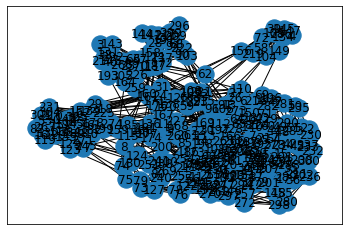

In [24]:
for i in range(306):
    for j in range(306):
        if w[i, j] != 0:
            G.addEdge(i, j)

G.visualize()

In [25]:
degree = np.zeros((306, 306))
for i in range(306):
    degree[i][i] = sum(w[i,:])

In [26]:
laplacian = degree - w

In [27]:
from numpy.linalg import matrix_power, inv

In [28]:
t = np.sqrt((np.linalg.inv(degree)))
norm_laplacian = t @ laplacian @ t

In [29]:
Y_embed = np.zeros(306)
s = 0
for i in range(306):
    s += np.norm(Y_combined[i] - (w[i,:].dot(Y_combined)))**2

AttributeError: module 'numpy' has no attribute 'norm'

In [30]:
Y_embed

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
duu = degree[147:, 147:]
wuu = w[147:, 147:]
wul = w[147:, :147]
k = np.linalg.inv(duu - wuu) @ wul
pred = k @ Y
Y_true

array([1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 1., 1., 2., 2.,
       2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 1., 1., 1., 2., 2.,
       1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 2.,
       2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1.,
       1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2.,
       1., 1., 1., 1., 2., 2.])

In [32]:
%pip install -i https://pypi.gurobi.com gurobipy;
import gurobipy

Looking in indexes: https://pypi.gurobi.com
Note: you may need to restart the kernel to use updated packages.


In [33]:
#GRF algorithm: results seem pretty bad, calculating the average class of a node's neighbors
#does not seem viable for classification problems.

for i in range(3):
    w = KNNgraph(i, similarity)
   
    degree = np.zeros((306, 306))
    for i in range(306):
        degree[i][i] = sum(w[i,:])
    duu = degree[147:, 147:]
    wuu = w[147:, 147:]
    wul = w[147:, :147]
    k = np.linalg.inv(duu - wuu) @ wul
    pred = k @ Y     
    print(np.sum(np.abs(Y_true - pred))/159)

0.39416516255392703


LinAlgError: Singular matrix

In [34]:
degree

array([[ 25.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,  25.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,  25., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,  85.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,  45.,   0.],
       [  0.,   0.,   0., ...,   0.,   0., 150.]])

In [36]:
#Solving with LGC algorithm: slightly better result than GRF
def LGC(w, deg):
    y_pred = cp.Variable(306)
    objective = 0
    constraints = []
    for i in range(306):
        constraints += [y_pred[i] >=0]
        constraints += [y_pred[i] <=7]
    
        for j in range(306):
            t = w[i, j]*((1/np.sqrt(deg[i,i])*y_pred[i]) - (1/np.sqrt(deg[j, j])*y_pred[j]))**2
            objective += t
    objective += sum((y_pred[:147] - Y)**2)
    prob = cp.Problem(cp.Minimize(objective), constraints)
    prob.solve(solver=cp.OSQP)
    return y_pred.value

In [40]:
#conda install -c conda-forge cvxpy
#!conda install cvxpy
import cvxpy as cp
#pip install cvxpy

^C


In [37]:
import gurobipy
prob = cp.Problem(cp.Minimize(objective), constraints)

NameError: name 'cp' is not defined

In [ ]:
prob.solve(solver=cp.OSQP)

In [ ]:
print(y_pred.value)

In [ ]:
p = y_pred.value
print(np.sum(np.abs(Y_true - p[100:]))/94)

In [ ]:
print(np.matrix.round(p))

In [ ]:
for i in range(10):
    w = KNNgraph(i, similarity)
    deg = np.zeros((306, 306))
    for i in range(306):
        deg[i][i] = sum(w[i,:])
    val = LGC(w, deg)
    print(np.sum(np.abs(Y_true - val[100:]))/94)

In [ ]:
from karateclub import DeepWalk
import networkx as nx
G1 = nx.from_pandas_edgelist(df, "row_num", "Categories", create_using=nx.Graph())
model = DeepWalk(walk_length=10, dimensions=7, window_size=5)
model.fit(G1)
embedding = model.get_embedding()